<a href="https://colab.research.google.com/github/shahabas9/Deep_learning_basics/blob/main/ANN_implememtation_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Tue Aug 15 13:40:47 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   52C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import tensorflow as tf
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
print(f"Tensorflow version is {tf.__version__}")
print(f"keras version is {tf.keras.__version__}")

Tensorflow version is 2.12.0
keras version is 2.12.0


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
pwd

'/content/drive/MyDrive/Colab Notebooks'

In [5]:
root="/content/drive/MyDrive/Colab Notebooks"

In [6]:
os.chdir(root)


In [7]:
pwd

'/content/drive/MyDrive/Colab Notebooks'

# GPU and CPU check


In [8]:
tf.config.list_logical_devices("GPU")

[LogicalDevice(name='/device:GPU:0', device_type='GPU')]

In [9]:
tf.config.list_logical_devices("CPU")

[LogicalDevice(name='/device:CPU:0', device_type='CPU')]

In [10]:
check_list=["GPU","CPU"]

for device in check_list:
  out=tf.config.list_logical_devices(device)
  if len(out)>0:
    print(f"the available device is {out}")

  else:
    print("there is no device connnected")


the available device is [LogicalDevice(name='/device:GPU:0', device_type='GPU')]
the available device is [LogicalDevice(name='/device:CPU:0', device_type='CPU')]


# Load MNIST dataset

In [11]:
mnist=tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_y_test) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [12]:
len(x_train)

60000

In [13]:
len(x_train[0])

28

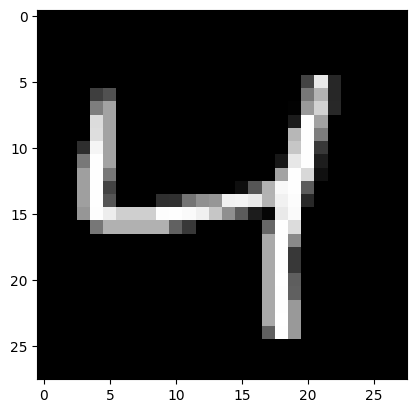

In [14]:
plt.imshow(x_train[2],cmap="gray")
plt.show()

In [15]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [16]:
x_train.dtype

dtype('uint8')

<Axes: >

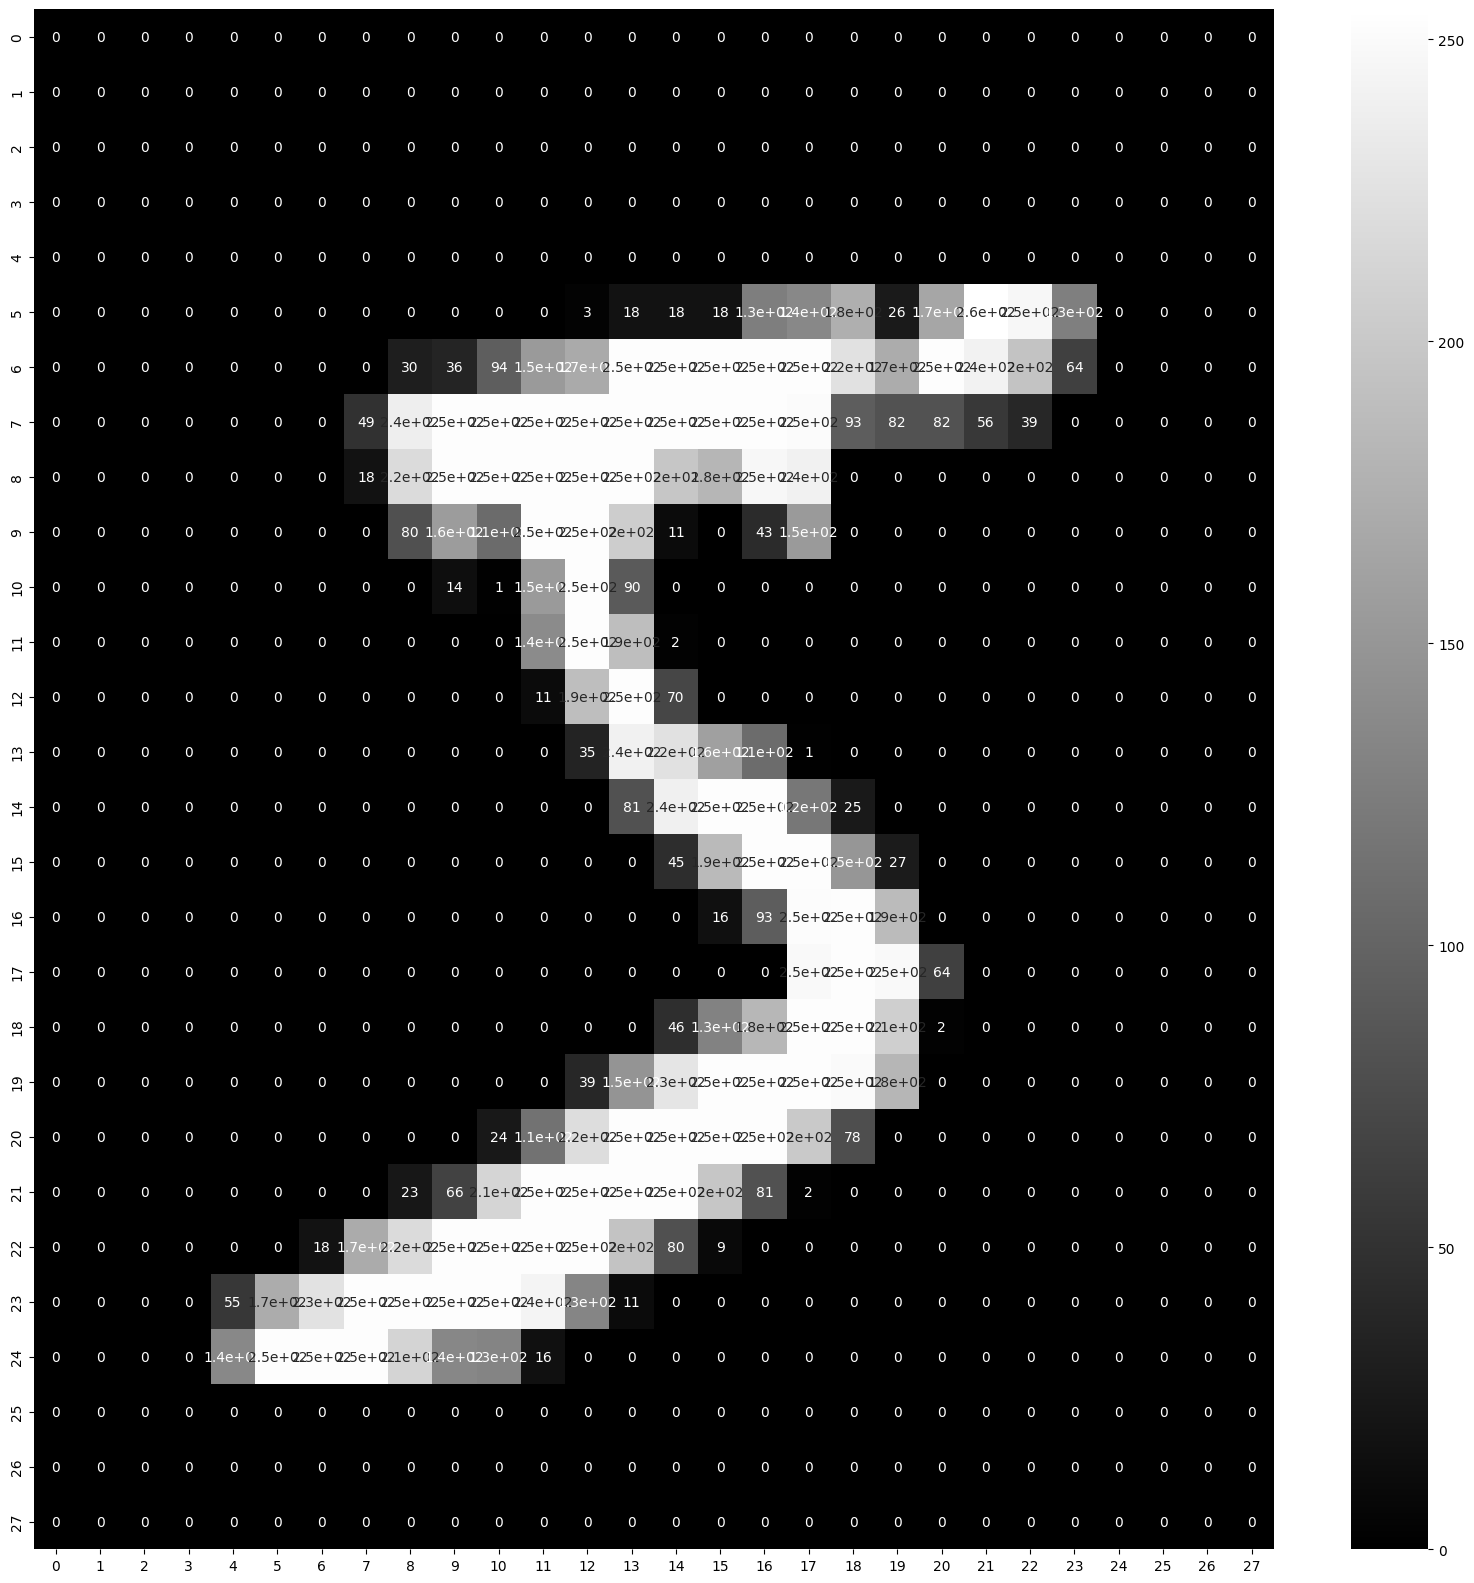

In [17]:
plt.figure(figsize=(20,20))
sns.heatmap(x_train[0],annot=True,cmap="gray")

In [18]:
x_valid,x_train=x_train[:5000]/255. , x_train[5000:]/255.
y_valid,y_train=y_train[:5000] , y_train[5000:]

<Axes: >

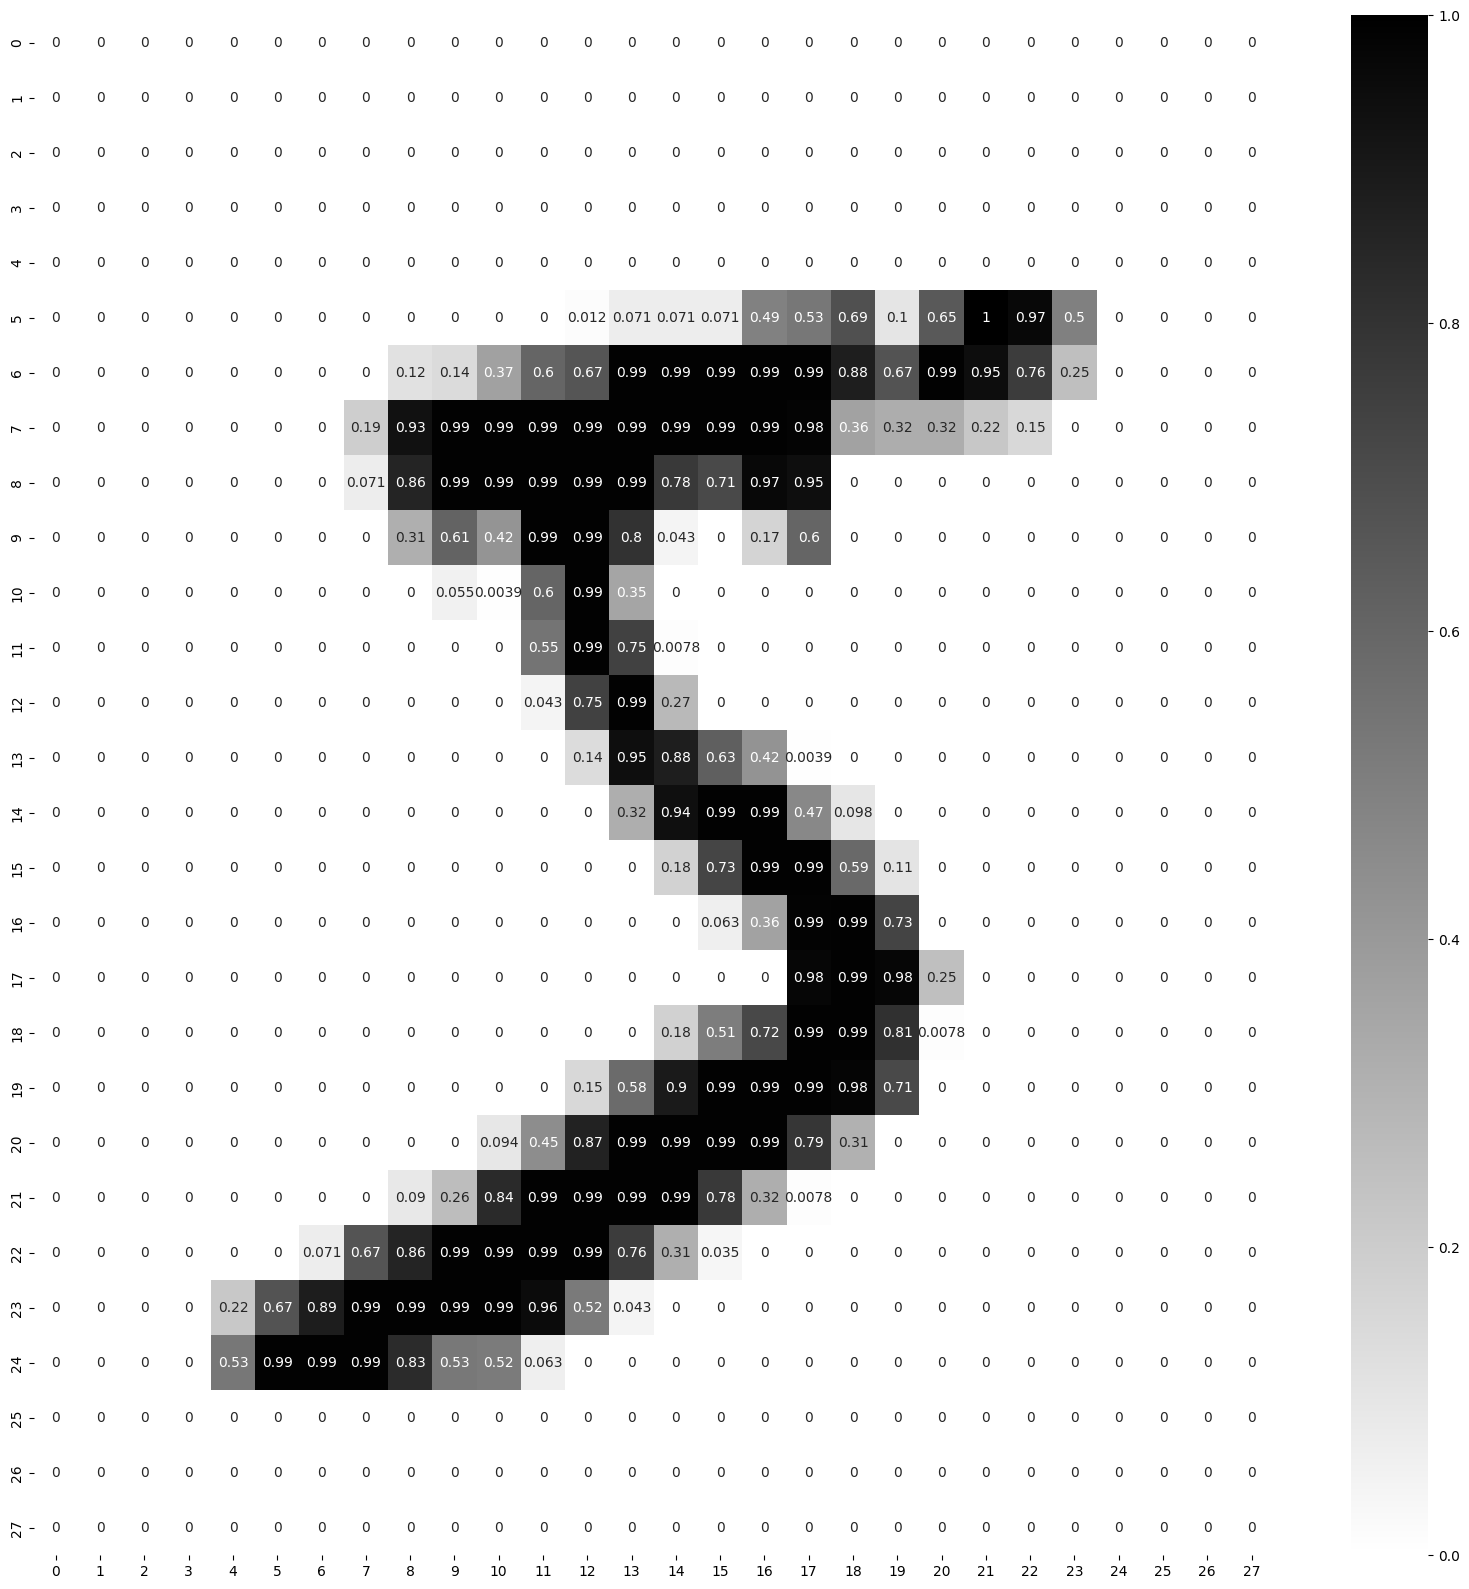

In [19]:
plt.figure(figsize=(20,20))
sns.heatmap(x_valid[0],annot=True,cmap="binary")

In [20]:
x_test=x_test/255.

In [21]:
layers=[
    tf.keras.layers.Flatten(input_shape=[28,28],name="input_layer"),
    tf.keras.layers.Dense(300,activation="relu",name="hidden_layer_1"),
    tf.keras.layers.Dense(100,activation="relu",name="hidden_layer_2"),
    tf.keras.layers.Dense(10,activation="softmax",name="final_layer")
]

model=tf.keras.models.Sequential(layers)


In [22]:
model.layers

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Flatten)       (None, 784)               0         
                                                                 
 hidden_layer_1 (Dense)      (None, 300)               235500    
                                                                 
 hidden_layer_2 (Dense)      (None, 100)               30100     
                                                                 
 final_layer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [25]:
#1st layer

784*300+300

235500

In [26]:
#2nd layer

300*100+100

30100

In [27]:
#3rd layer

100*10+10

1010

In [29]:
# total params

235500+30100+1010


266610

In [30]:
hidden_1=model.layers[1]

In [31]:
hidden_1.get_weights()

[array([[-0.06783783, -0.03712912,  0.01506236, ..., -0.02977638,
          0.04862661,  0.0470564 ],
        [-0.06174292, -0.06114279, -0.02572379, ...,  0.02833993,
         -0.06837153, -0.07312749],
        [-0.06312165, -0.07095464, -0.00897413, ..., -0.02684252,
         -0.06357247, -0.07439391],
        ...,
        [-0.04312601, -0.06271864,  0.04403561, ...,  0.0656836 ,
         -0.02259795,  0.03046247],
        [ 0.0316079 , -0.04417345,  0.05788931, ...,  0.05124529,
          0.06194067,  0.0743714 ],
        [ 0.00947493, -0.0007356 , -0.00419846, ..., -0.03805805,
          0.06871328, -0.00876147]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [32]:
loss_function="sparse_categorical_crossentropy"
optimizer="SGD"
metrics=["accuracy"]

model.compile(loss=loss_function,optimizer=optimizer,metrics=metrics)

In [44]:
import time

def get_log_path(log_path="./logs/fit"):
  filename=time.strftime("log_%Y_%m_%d_%H_%M_%S")
  logs_paths=os.path.join(log_path,filename)
  print(f"Savings logs at {logs_paths}")
  return logs_paths


log_dir=get_log_path(log_path="logs/fit")

tb_cb=tf.keras.callbacks.TensorBoard(log_dir=log_dir)

Savings logs at logs/fit/log_2023_08_15_17_37_38
logs/fit/log_2023_08_15_17_37_38


In [45]:
early_stopping_cb=tf.keras.callbacks.EarlyStopping(patience=5,restore_best_weights=True)


In [46]:
ckpt_path="output/model_ckpt.h5"
checkpointing_cb=tf.keras.callbacks.ModelCheckpoint(ckpt_path,save_best_only=True)


In [47]:
# model traiining

epochs=10
validation_set = (x_valid,y_valid)
history=model.fit(x_train,y_train,epochs=epochs,validation_data=validation_set,batch_size=33,callbacks=[tb_cb,early_stopping_cb,checkpointing_cb])


Epoch 1/10
1667/1667 [==============================] - 14s 5ms/step - loss: 0.5913 - accuracy: 0.8483 - val_loss: 0.3099 - val_accuracy: 0.9130
Epoch 2/10
1667/1667 [==============================] - 7s 4ms/step - loss: 0.2872 - accuracy: 0.9179 - val_loss: 0.2392 - val_accuracy: 0.9320
Epoch 3/10
1667/1667 [==============================] - 9s 5ms/step - loss: 0.2343 - accuracy: 0.9331 - val_loss: 0.2036 - val_accuracy: 0.9440
Epoch 4/10
1667/1667 [==============================] - 7s 4ms/step - loss: 0.2003 - accuracy: 0.9427 - val_loss: 0.1804 - val_accuracy: 0.9514
Epoch 5/10
1667/1667 [==============================] - 11s 7ms/step - loss: 0.1750 - accuracy: 0.9501 - val_loss: 0.1586 - val_accuracy: 0.9558
Epoch 6/10
 405/1667 [======>.......................] - ETA: 4s - loss: 0.1681 - accuracy: 0.9528

KeyboardInterrupt: ignored

In [48]:
# loading from where we stopped the training

ckpt_model=tf.keras.models.load_model(ckpt_path)
history=ckpt_model.fit(x_train,y_train,epochs=epochs,validation_data=validation_set,batch_size=33,callbacks=[tb_cb,early_stopping_cb,checkpointing_cb])

Epoch 1/10
1667/1667 [==============================] - 8s 4ms/step - loss: 0.1549 - accuracy: 0.9555 - val_loss: 0.1467 - val_accuracy: 0.9606
Epoch 2/10
1667/1667 [==============================] - 10s 6ms/step - loss: 0.1391 - accuracy: 0.9595 - val_loss: 0.1355 - val_accuracy: 0.9642
Epoch 3/10
1667/1667 [==============================] - 7s 4ms/step - loss: 0.1261 - accuracy: 0.9640 - val_loss: 0.1256 - val_accuracy: 0.9650
Epoch 4/10
1667/1667 [==============================] - 8s 5ms/step - loss: 0.1150 - accuracy: 0.9671 - val_loss: 0.1199 - val_accuracy: 0.9684
Epoch 5/10
1667/1667 [==============================] - 10s 6ms/step - loss: 0.1055 - accuracy: 0.9697 - val_loss: 0.1185 - val_accuracy: 0.9676
Epoch 6/10
1667/1667 [==============================] - 7s 4ms/step - loss: 0.0971 - accuracy: 0.9729 - val_loss: 0.1051 - val_accuracy: 0.9706
Epoch 7/10
1667/1667 [==============================] - 8s 5ms/step - loss: 0.0898 - accuracy: 0.9745 - val_loss: 0.1012 - val_accurac

In [49]:
# save the model

def save_model(model_path="Model_dir"):
  os.makedirs(model_path,exist_ok=True)
  filename=time.strftime("model_%Y_%m_%H_%M_%S.h5")
  models_path=os.path.join(model_path,filename)
  print(f"model is saving at {models_path}")
  return models_path



In [50]:
model_dir=save_model()
model_dir

model is saving at Model_dir/model_2023_08_18_08_28.h5


'Model_dir/model_2023_08_18_08_28.h5'

In [51]:
tf.keras.models.save_model(model,model_dir)

In [52]:
import pandas as pd
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.154916,0.955527,0.146735,0.9606
1,0.139091,0.959527,0.135505,0.9642
2,0.126107,0.964000,0.125573,0.9650
3,0.114993,0.967055,0.119895,0.9684
4,0.105506,0.969673,0.118485,0.9676
5,0.097124,0.972873,0.105146,0.9706
6,0.089818,0.974545,0.101181,0.9706
7,0.083255,0.977036,0.098663,0.9724
8,0.077685,0.978127,0.094635,0.9730
9,0.072435,0.979855,0.091015,0.9746


<Axes: >

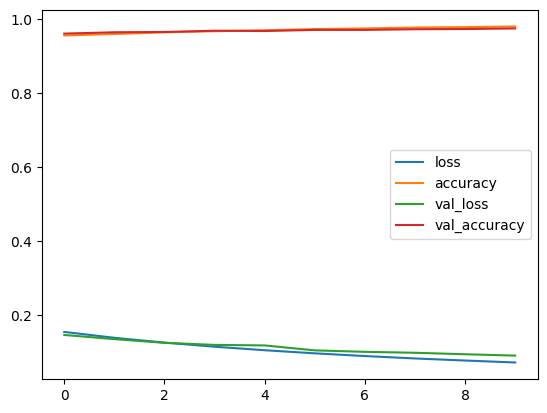

In [53]:
pd.DataFrame(history.history).plot()

In [79]:

tensorboard --helpfull


ERROR: Failed to launch TensorBoard (exited with 0).
Contents of stderr:
2023-08-15 18:42:58.800487: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Contents of stdout:
usage: tensorboard [-h] [--helpfull] [--logdir PATH] [--logdir_spec PATH_SPEC]
                   [--host ADDR] [--bind_all] [--port PORT]
                   [--reuse_port BOOL] [--load_fast {false,auto,true}]
                   [--extra_data_server_flags EXTRA_DATA_SERVER_FLAGS]
                   [--grpc_creds_type {local,ssl,ssl_dev}]
                   [--grpc_data_provider PORT] [--purge_orphaned_data BOOL]
                   [--db URI] [--db_import] [--inspect] [--version_tb]
                   [--tag TAG] [--event_file PATH] [--path_prefix PATH]
                   [--window_title TEXT] [--max_reload_threads COUNT]
                   [--reload_interval SECONDS] [--reload_task TYPE]
                   [--reload_multifile BOOL]
                   [--reload_multifile_in

In [80]:

%load_ext tensorboard

%tensorboard --log_dir spec=name:logs/fit

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


ERROR: Failed to launch TensorBoard (exited with 1).
Contents of stderr:
2023-08-15 18:46:13.811177: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Error: A logdir or db must be specified. For example `tensorboard --logdir mylogdir` or `tensorboard --db sqlite:~/.tensorboard.db`. Run `tensorboard --helpfull` for details and examples.

In [64]:
os.listdir("logs/fit")

['log_2023_08_15_17_37_38']

In [67]:
model.evaluate(x_test,y_y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.1614 - accuracy: 0.9542


[0.1614019274711609, 0.954200029373169]

In [69]:
x_new = x_test[:3]
y_new = y_y_test[:3]

y_prob=model.predict(x_new)

1/1 [==============================] - 0s 145ms/step


In [70]:
y_prob.round(3)

array([[0.   , 0.   , 0.001, 0.002, 0.   , 0.   , 0.   , 0.997, 0.   ,
        0.   ],
       [0.   , 0.   , 0.995, 0.004, 0.   , 0.   , 0.001, 0.   , 0.   ,
        0.   ],
       [0.   , 0.979, 0.008, 0.002, 0.   , 0.002, 0.001, 0.004, 0.003,
        0.   ]], dtype=float32)

In [71]:
y_pred=np.argmax(y_prob,axis=-1)
y_pred

array([7, 2, 1])

In [72]:
y_new

array([7, 2, 1], dtype=uint8)

In [73]:
model_path="Model_dir/model_2023_08_18_08_28.h5"
load_model=tf.keras.models.load_model(model_path)
load_model.evaluate(x_test,y_y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1614 - accuracy: 0.9542


[0.1614019274711609, 0.954200029373169]

In [74]:
predict=load_model.predict(x_new)
classes=np.argmax(predict,axis=-1)
classes

1/1 [==============================] - 0s 62ms/step


array([7, 2, 1])